In [1]:
pip install apyori;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Pernyataan `import` ini mengimpor semua paket yang diperlukan untuk analisis asosiasi. `pandas` digunakan untuk manipulasi data, `numpy` untuk operasi matematika, `apyori` untuk menerapkan algoritma Apriori, dan `apriori` dan `association_rules` dari `mlxtend.frequent_patterns` untuk analisis aturan asosiasi.


In [2]:
#import all required packages..
import pandas as pd
import numpy as np
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('joyoalkes 2023 - Data penjualannya.csv')
print(data)
# Convert to DataFrame
df = pd.DataFrame(data, columns=['Kode Transaksi', 'Kode Barang'])

# Normalize the data
df_normalized = df.groupby('Kode Transaksi')['Kode Barang'].apply(list).reset_index()

# Print the normalized DataFrame
print(df_normalized)


            Kode Transaksi            Timestamp         Kode Barang  \
0     48522020230102085555   2023-01-02 8:55:55    btraiqltbntdnger   
1     48522020230102093055   2023-01-02 9:30:55               026m3   
2     48522020230102093215   2023-01-02 9:32:15          O26m3part2   
3     48522020230102093230   2023-01-02 9:32:30               026m3   
4     48522020230102093340   2023-01-02 9:33:40          Btgkca10cm   
...                    ...                  ...                 ...   
5598  48522020231230142356  2023-12-30 14:23:56          krsetlumbL   
5599  48522020231230142455  2023-12-30 14:24:55         kaki4nomerk   
5600  48522020231230144828  2023-12-30 14:48:28       tensionevoice   
5601  48522020231230144828  2023-12-30 14:48:28                mic1   
5602  48522020231230144845  2023-12-30 14:48:45  freshcarekayuputih   

                             Nama Barang  Jumlah  Harga Jual       Total  
0               Batrai alat bantu dengar     1.0   39.500,00   39.500,00

Pembentukan 1 Item Set


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder()

# Transformasi data 'Kode Barang' ke representasi one-hot encoding
encoded_data = encoder.fit_transform(df_normalized['Kode Barang'].apply(lambda x: ','.join(x)).str.get_dummies(sep=','))

# Menerapkan K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df_normalized['Cluster'] = kmeans.fit_predict(encoded_data)

# Menampilkan hasil clustering
print(df_normalized[['Kode Transaksi', 'Cluster']])


TypeError: sequence item 0: expected str instance, float found

In [11]:
#Pembentukan 2 Item SET

import itertools

# Mendapatkan semua kode barang yang muncul dalam setiap transaksi
transactions = df_normalized['Kode Barang'].tolist()

# Membuat kombinasi 2-item set dari setiap transaksi
itemset_pairs = []
for transaction in transactions:
    pairs = list(itertools.combinations(transaction, 2))  # Membuat kombinasi pasangan 2-item
    itemset_pairs.extend(pairs)  # Menambahkan pasangan 2-item ke daftar itemset_pairs

# Membuat DataFrame dari itemset_pairs
df_itemset_pairs = pd.DataFrame(itemset_pairs, columns=['Item 1', 'Item 2'])

# Menghitung jumlah kemunculan setiap pasangan 2-item
pair_counts = df_itemset_pairs.groupby(['Item 1', 'Item 2']).size().reset_index(name='Jumlah Kemunculan')

# Menghitung support untuk setiap pasangan 2-item
pair_counts['Support'] = pair_counts['Jumlah Kemunculan'] / total_transactions

# Mengurutkan berdasarkan nilai support dan menampilkan sepuluh teratas
top_10_pairs = pair_counts.sort_values(by='Support', ascending=False).head(15)

print(top_10_pairs)


          Item 1          Item 2  Jumlah Kemunculan   Support
733   O26m3part2           O21m3                 41  0.009109
2526      t021m3             reg                 41  0.009109
697        O21m3      O26m3part2                 39  0.008665
711        O21m3  onehealthcanul                 34  0.007554
2540      t026m3             reg                 31  0.006887
702        O21m3   canulcosmomed                 25  0.005554
688        O21m3           026m3                 16  0.003555
6          026m3           O21m3                 13  0.002888
143        Ar6m3             Co6                 13  0.002888
2532      t021m3              tr                 11  0.002444
7          026m3      O26m3part2                 11  0.002444
737   O26m3part2  onehealthcanul                  9  0.002000
2533      t021m3    trolly1meter                  9  0.002000
2349   snelchart          ishara                  8  0.001777
694        O21m3          Geacan                  8  0.001777


In [12]:
# Membuat kombinasi 3-item set dari setiap transaksi
itemset_triplets = []
for transaction in transactions:
    triplets = list(itertools.combinations(transaction, 3))  # Membuat kombinasi triplet 3-item
    itemset_triplets.extend(triplets)  # Menambahkan triplet 3-item ke daftar itemset_triplets

# Membuat DataFrame dari itemset_triplets
df_itemset_triplets = pd.DataFrame(itemset_triplets, columns=['Item 1', 'Item 2', 'Item 3'])

# Menghitung jumlah kemunculan setiap triplet 3-item
triplet_counts = df_itemset_triplets.groupby(['Item 1', 'Item 2', 'Item 3']).size().reset_index(name='Jumlah Kemunculan')

# Menghitung support untuk setiap triplet 3-item
triplet_counts['Support'] = triplet_counts['Jumlah Kemunculan'] / total_transactions

# Mengurutkan berdasarkan nilai support dan menampilkan sepuluh teratas
top_10_triplets = triplet_counts.sort_values(by='Support', ascending=False).head(15)

print(top_10_triplets)


                Item 1             Item 2                Item 3  \
22520           t021m3                reg                    tr   
22530           t021m3                 tr                   reg   
3655             Bk508               Kom8  needleholderiedstuff   
4235             Bk508  iedstuffuphecting  needleholderiedstuff   
4213             Bk508    iedstuffpinbeng      1edstuff3scalpel   
4527             Bk508     peanluiedstuff      1edstuff3scalpel   
3639             Bk508               Kom8      1edstuff3scalpel   
6633              Kom8  iedstuffuphecting  needleholderiedstuff   
16521  iedstuffpinbeng     peanluiedstuff      1edstuff3scalpel   
4539             Bk508     peanluiedstuff  needleholderiedstuff   
4224             Bk508    iedstuffpinbeng  needleholderiedstuff   
4225             Bk508    iedstuffpinbeng        peanluiedstuff   
3724             Bk508   anatomis1edstuff      chirugis1rdstuff   
3645             Bk508               Kom8      chirugis1rdstuf

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


"Dataframe awal df diubah dengan mengambil hanya dua kolom yang relevan, yaitu 'Kode Transaksi' dan 'Nama Barang', sedangkan kolom-kolom lainnya diabaikan. Langkah ini dilakukan untuk mempersiapkan data yang akan digunakan dalam analisis Apriori, di mana hanya informasi tentang transaksi (Kode Transaksi) dan item-item yang dibeli (Nama Barang) yang relevan untuk mengidentifikasi pola pembelian yang mungkin terjadi."


In [13]:

# Filter df_normalized di mana 'Kode Barang' memiliki lebih dari satu nilai
df_multiple_items = df_normalized[df_normalized['Kode Barang'].str.len() > 1]

# Tampilkan DataFrame yang telah difilter
print(df_multiple_items)

            Kode Transaksi                          Kode Barang
6     48522020230102093537             [Undrpdnmed, mic1, mic2]
17    48522020230103081233                  [nec28, O26m3part2]
18    48522020230103081320      [O26m3part2, rgltrmedicallotus]
31    48522020230104101419                       [O21m3, 026m3]
34    48522020230104114727                       [O21m3, 026m3]
...                    ...                                  ...
4464  48522020231227143702                  3, O26m3part2]
4470  48522020231229082043                    [O26m3part2, Co6]
4490  48522020231230084805  [needleholderiedstuff, benangjahit]
4496  48522020231230142356                [Lumbalm, krsetlumbL]
4498  48522020231230144828                [tensionevoice, mic1]

[672 rows x 2 columns]


Tentu, berikut adalah penjelasan langkah-langkahnya:

1. **Inisialisasi TransactionEncoder**: `TransactionEncoder` adalah objek yang digunakan untuk mengubah data transaksi menjadi bentuk yang dapat diproses oleh algoritma asosiasi. Ini akan mengonversi data transaksi ke dalam bentuk array boolean di mana setiap kolom akan mewakili keberadaan atau ketiadaan suatu item dalam transaksi.

2. **Mengaplikasikan TransactionEncoder pada 'Kode Barang' di df_multiple_items**: `te.fit(df_multiple_items['Kode Barang'])` digunakan untuk mempelajari item apa saja yang ada dalam data transaksi. Kemudian, `transform(df_multiple_items['Kode Barang'])` akan mengubah setiap transaksi menjadi array boolean berdasarkan pembelajaran yang telah dilakukan.

3. **Membuat DataFrame baru dengan array boolean dan nama kolom dari TransactionEncoder**: `df_encoded = pd.DataFrame(te_ary, columns=te.columns_)` akan membuat DataFrame baru dari array boolean yang dihasilkan, di mana setiap kolom akan mewakili satu item dan setiap baris akan mewakili satu transaksi.

4. **Menjalankan algoritma Apriori dengan support minimum 0.02**: `apriori(df_encoded, min_support=0.02, use_colnames=True)` akan menjalankan algoritma Apriori untuk menemukan itemset yang sering muncul bersama-sama (frequent itemsets) dengan support minimum 0.02.

5. **Menjalankan association rules dengan confidence minimum 0.4**: `association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)` akan menjalankan algoritma untuk menemukan aturan asosiasi dengan confidence minimum 0.4 dari frequent itemsets yang telah ditemukan sebelumnya.

6. **Menampilkan frequent itemsets**: `print(frequent_itemsets)` akan menampilkan itemset yang sering muncul bersama-sama beserta supportnya.

7. **Menampilkan association rules**: `print(rules)` akan menampilkan aturan asosiasi yang ditemukan beserta metrik-metriknya seperti antecedents (item/itemset yang menjadi syarat), consequents (item/itemset yang menjadi hasil), support, confidence, dan lift.


In [14]:

# Inisialisasi TransactionEncoder
te = TransactionEncoder()
# Mengaplikasikan TransactionEncoder pada 'Kode Barang' di df_multiple_items dan mengubahnya menjadi array boolean
te_ary = te.fit(df_multiple_items['Kode Barang']).transform(df_multiple_items['Kode Barang'])
# Membuat DataFrame baru dengan array boolean dan nama kolom dari TransactionEncoder
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Menjalankan algoritma Apriori dengan support minimum 0.1
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Menampilkan frequent itemsets
print(frequent_itemsets)

# Menjalankan association rules dengan confidence minimum 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Menampilkan association rules
print(rules)




     support                 itemsets
0   0.080357                  (026m3)
1   0.324405                  (O21m3)
2   0.187500             (O26m3part2)
3   0.068452          (canulcosmomed)
4   0.075893         (onehealthcanul)
5   0.114583                    (reg)
6   0.078869                 (t021m3)
7   0.062500                 (t026m3)
8   0.119048      (O21m3, O26m3part2)
9   0.055060  (O21m3, onehealthcanul)
10  0.063988            (reg, t021m3)
        antecedents consequents  antecedent support  consequent support  \
0      (O26m3part2)     (O21m3)            0.187500            0.324405   
1  (onehealthcanul)     (O21m3)            0.075893            0.324405   
2          (t021m3)       (reg)            0.078869            0.114583   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.119048    0.634921  1.957187  0.058222    1.850543       0.601923  
1  0.055060    0.725490  2.236373  0.030440    2.461097       0.598250  
2  0.063988    0.811321 

Data dari DataFrame df diubah menjadi format transaksional untuk analisis pola pembelian menggunakan algoritma Apriori. Langkah-langkah ini melibatkan pengelompokkan data berdasarkan 'Kode Transaksi' dan 'Nama Barang', diikuti dengan perhitungan frekuensi kemunculan setiap pasangan 'Kode Transaksi' dan 'Nama Barang'. Hasilnya diubah menjadi matriks dengan 'Kode Transaksi' sebagai indeks baris, 'Nama Barang' sebagai kolom, dan frekuensi kemunculan sebagai nilai sel. Selanjutnya, nilai-nilai yang hilang (yang menunjukkan bahwa suatu item tidak dibeli dalam suatu transaksi) diisi dengan nilai 0. Proses ini menghasilkan representasi data yang sesuai untuk analisis asosiasi pembelian.


In [15]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


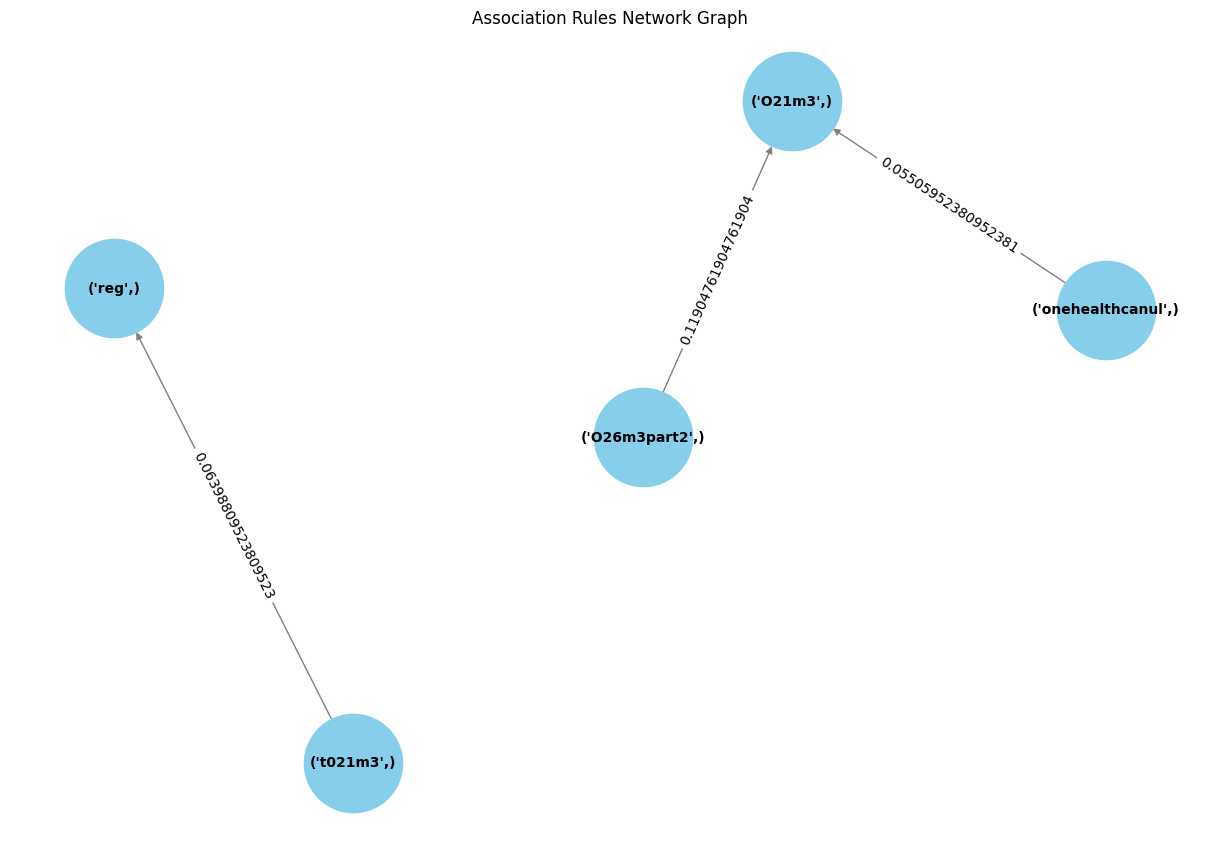

In [16]:
# Import library yang diperlukan
import networkx as nx  # Library untuk membuat dan memanipulasi grafik
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi

# Membuat graph dari rules
G = nx.DiGraph()  # Membuat graph dengan tipe directed graph (DiGraph) untuk menunjukkan arah asosiasi
for idx, row in rules.iterrows():  # Iterasi melalui setiap aturan asosiasi dalam DataFrame rules
    # Menambahkan edge (sisi) pada graph G dengan antecedents sebagai node awal dan consequents sebagai node tujuan
    # Weight (berat) edge ditentukan oleh support dari aturan asosiasi
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# Menyimpan posisi node menggunakan spring layout
pos = nx.spring_layout(G)

# Membuat visualisasi graph
plt.figure(figsize=(12, 8))  # Mengatur ukuran gambar
nx.draw(G, pos,  # Menggambar graph G dengan posisi node pos
        with_labels=True,  # Menampilkan label pada node
        node_size=5000,  # Ukuran node
        node_color='skyblue',  # Warna node
        font_size=10,  # Ukuran font label node
        font_weight='bold',  # Ketebalan font label node
        edge_color='gray')  # Warna edge
# Menampilkan label pada edge berupa support
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Association Rules Network Graph')  # Memberikan judul pada visualisasi
plt.show()  # Menampilkan visualisasi
